In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta 

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date[0])

2017-08-23


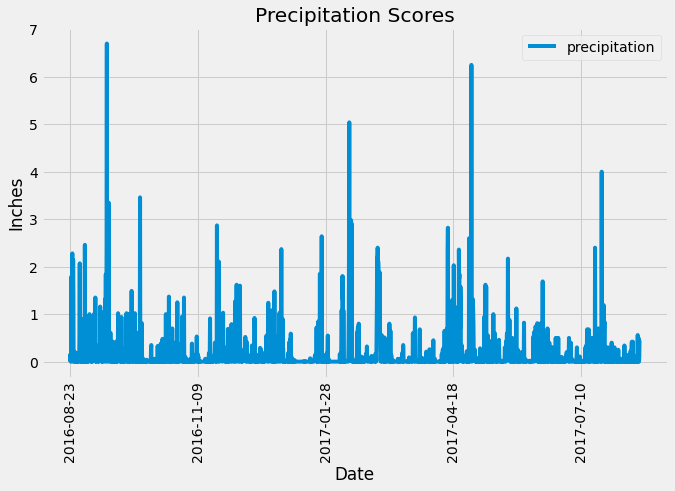

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
lastdate = recent_date[0]
# Calculate the date one year from the last date in data
oneyearfromlastdate = (datetime.strptime(recent_date[0], '%Y-%m-%d') - timedelta(days=365)).strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
query_results = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= oneyearfromlastdate).filter(Measurement.date <= lastdate).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date = [query_results[0] for query_results in query_results]
prcp = [query_results[1] for query_results in query_results]

precipitation_df = pd.DataFrame(prcp, index = date, 
                                              columns =['precipitation']) 

precipitation_df = precipitation_df.fillna(0)

# Sort the dataframe by date
precipitation_df=precipitation_df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_df.plot(figsize=(10,6),rot=90)
ax.set(xlabel="Date",
       ylabel="Inches",
       title="Precipitation Scores")
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
query_results = session.query(Station.id).count()
print(query_results)

9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
query_results = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
i = 1
for results in query_results:
    print(i,results[0],results[1])
    i+=1

1 USC00519281 2772
2 USC00519397 2724
3 USC00513117 2709
4 USC00519523 2669
5 USC00516128 2612
6 USC00514830 2202
7 USC00511918 1979
8 USC00517948 1372
9 USC00518838 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# query = "select min(tobs), max(tobs), avg(tobs) from measurement where station = 'USC00519281'"
query_results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(f"lowest temp: " + str(query_results[0][0]))
print(f"higest temp: " + str(query_results[0][1]))
print(f"average temp: " + str((round(query_results[0][2],2))))

lowest temp: 54.0
higest temp: 85.0
average temp: 71.66


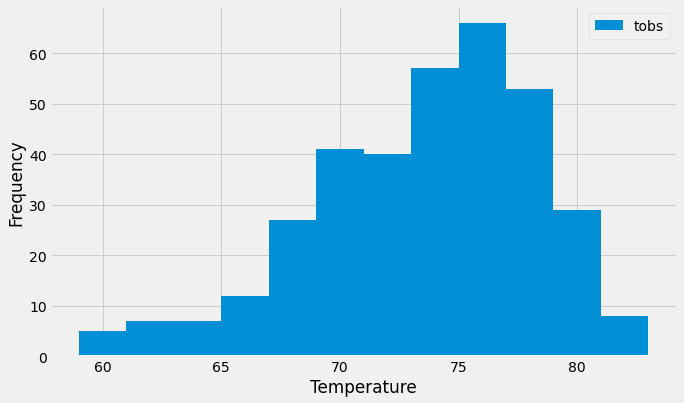

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# query = "SELECT date, tobs FROM Measurement where date >= '" + oneyearfromlastdate + "' and date <= '" + lastdate +"'" + "and station='USC00519281'"

query_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= oneyearfromlastdate).filter(Measurement.date <= lastdate).all()

# Save the query results as a Pandas DataFrame
date = [query_results[0] for query_results in query_results]
temperature = [query_results[1] for query_results in query_results]


temperature_df = pd.DataFrame(temperature,date,columns=['tobs']) 

ax = temperature_df.hist(figsize=(10,6), bins=12)

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("")
plt.legend(['tobs'], loc='upper right') 
plt.show()


In [16]:
# Close Session
session.close()